PART 2: Bron–Kerbosch Algorithm

Graph G:
Vertices: A, B, C, D
Edges: AB, AC, BC, CD


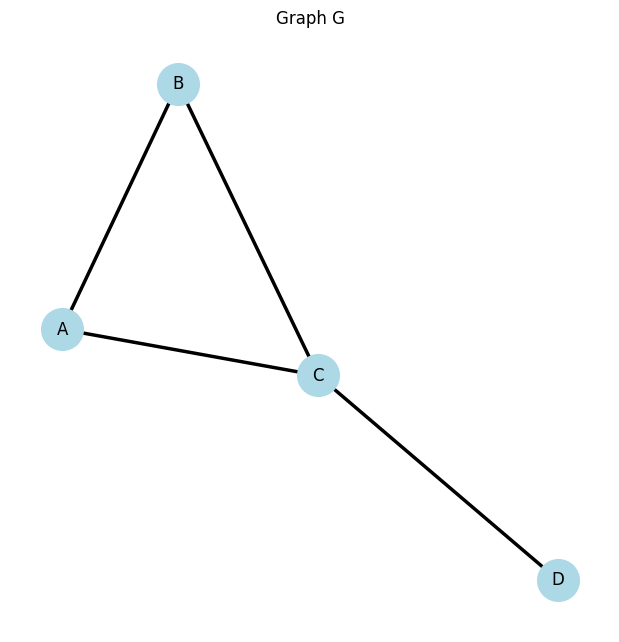


--------------------------------------------------
Trace of fisrt recursive calls:
--------------------------------------------------

1. Start:
   R = {}, P = {A, B, C, D}, X = {}

2. Take A first:
   Now R = {A}, P = {B, C} (neighbors of A)

3. From R={A} take B:
   R = {A, B}, P = {C} (common neighbors)

4. Then take C:
   R = {A, B, C}, P = {} -> clique found!

RESULTS

Initial values:
R = empty set
P = {'D', 'C', 'B', 'A'}
X = empty set

Found cliques:
1. ['C', 'D']
2. ['A', 'B', 'C']

Max clique size: 3
Maximal cliques with that size:
  ['A', 'B', 'C']


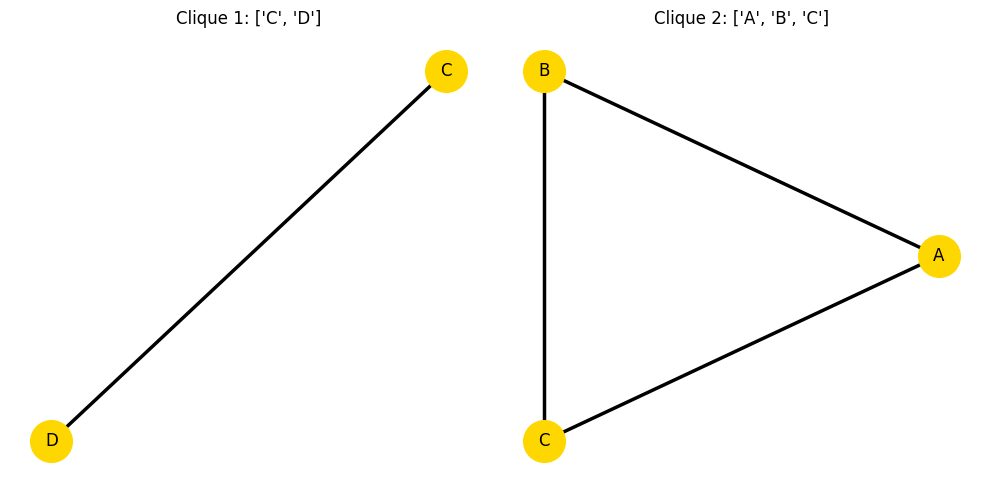


FINAL ANSWER

All maximal cliques:
 - {A, B, C}
 - {C, D}

Biggest clique: {A, B, C} (size = 3)


In [7]:

!pip install networkx matplotlib numpy

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


print("PART 2: Bron–Kerbosch Algorithm")
print("=" * 60)

graph = {
    "A": ["B", "C"],
    "B": ["A", "C"],
    "C": ["A", "B", "D"],
    "D": ["C"]
}

print("\nGraph G:")
print("Vertices: A, B, C, D")
print("Edges: AB, AC, BC, CD")

#drawiing the graph
G = nx.Graph()
for v in graph:
    for nb in graph[v]:
        G.add_edge(v, nb)

plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, seed=5)
nx.draw(G, pos, with_labels=True, node_color="lightblue",
        node_size=900, width=2.5)
plt.title("Graph G")
plt.show()


#Bron–kerbosch without pivot
def bron_kerbosch_no_pivot(R, P, X, graph, all_cliques):

    #if no more vertices to explore and x is empty too then,we found a maximal clique
    if len(P) == 0 and len(X) == 0:
        all_cliques.append(set(R))
        return

    #copy P so that we can change the original while looping
    P_copy = P.copy()

    for v in P_copy:
        bron_kerbosch_no_pivot(
            R.union({v}),
            P.intersection(graph[v]),
            X.intersection(graph[v]),
            graph,
            all_cliques
        )

        #move v from P to X(because we tried it now)
        P.remove(v)
        X.add(v)


def find_all_cliques(graph):
    """
    Just runs the BK algorithm and returns all maximal cliques.
    """
    all_cliques = []
    verts = list(graph.keys())

    R = set()# current clique
    P = set(verts)# can expand clique
    X = set()#already tried

    print("\nInitial values:")
    print("R = empty set")
    print("P =", P)
    print("X = empty set")

    bron_kerbosch_no_pivot(R, P, X, graph, all_cliques)
    return all_cliques


print("\n" + "-" * 50)
print("Trace of fisrt recursive calls:")
print("-" * 50)

print("\n1. Start:")
print("   R = {}, P = {A, B, C, D}, X = {}")

print("\n2. Take A first:")
print("   Now R = {A}, P = {B, C} (neighbors of A)")

print("\n3. From R={A} take B:")
print("   R = {A, B}, P = {C} (common neighbors)")

print("\n4. Then take C:")
print("   R = {A, B, C}, P = {} -> clique found!")


#кгтthe full process
print("\n" + "=" * 50)
print("RESULTS")
print("=" * 50)

all_cliques = find_all_cliques(graph)

print("\nFound cliques:")
for i, cl in enumerate(all_cliques, 1):
    print(f"{i}. {sorted(cl)}")

#find the biggest clique
max_len = max(len(c) for c in all_cliques)
max_cliques = [c for c in all_cliques if len(c) == max_len]

print("\nMax clique size:", max_len)
print("Maximal cliques with that size:")
for c in max_cliques:
    print(" ", sorted(c))


# ===visualization of all cliques =====
fig, axes = plt.subplots(1, len(all_cliques), figsize=(5*len(all_cliques), 5))

if len(all_cliques) == 1:
    axes = [axes]

for idx, cl in enumerate(all_cliques):
    sg = G.subgraph(cl)
    pos = nx.circular_layout(sg)
    nx.draw(
        sg, pos,
        with_labels=True,
        node_color="gold",
        node_size=900,
        width=2.5,
        ax=axes[idx]
    )
    axes[idx].set_title(f"Clique {idx+1}: {sorted(cl)}")




plt.tight_layout()
plt.show()


# =final printed summary =====
print("\n" + "=" * 60)
print("FINAL ANSWER")
print("=" * 60)

print("\nAll maximal cliques:")
print(" - {A, B, C}")
print(" - {C, D}")

print("\nBiggest clique: {A, B, C} (size = 3)")
